In [1]:
import csv
from collections import OrderedDict
import numpy as np
import os
from os.path import exists
import collections
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [3]:
def geocode(filename):
    with open(filename, 'r') as fid:
        header_list = fid.readline().strip().split(",")
        header_list.append("Hour")
        header_list.append("Day")
        header_list.append("Month")
        header_list.append("Year")

    with open('data_updated.csv', 'w', encoding='UTF8', newline='') as f:
        with open(filename, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            geolocator = Nominatim(user_agent="geoapiExercises")
            writer = csv.writer(f)
            writer.writerow(header_list)

            count = 0
            s_count = 0
            c_count = 0
            exit_c = 0
            for row in reader:

                curr_val = row['Start_Time']
                if row['City'] == "" or row['City'] == None:
                    count += 1
                    location = geolocator.geocode(row['Zipcode'])
                    details = location.address.split(",")
                    row['City'] = details[0]
                    #print(row['ID'], details[0], "city")

                time_split = curr_val.split(" ")
                day_split = time_split[0].split("-")
                hour_split = time_split[1].split(":")
                row['Hour'] = hour_split[0]
                row["Day"] = day_split[2]
                row["Month"] = day_split[1]
                row["Year"] = day_split[0]
                # print(row,row['Hour'],row["Day"],row["Month"],row["Year"],"crow")

                writer.writerow(row.values())

In [5]:
input_file = "data.csv"
output_file = "data_updated.csv"
dataset = "US_Accidents.csv"
 
#geocode (input_file)

csv_rows = process_csv(output_file)
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

In [6]:
new_list = [["Severity","Start_Time","Distance(mi)","Side","City","County","State","Zipcode","Visibility(mi)","Weather_Condition","Bump","Crossing","Junction","No_Exit","Traffic_Signal","Turning_Loop","Hour","Day","Month","Year"]]

for row in csv_data:
    new_row = []
    for i in range(len(csv_header)):
        if i == 1 or i == 2 or i== 8 or  i == 12 or i == 13 or i == 14 or i == 15 or i == 16 or i == 25 or i == 29 or i == 31 or i == 32 or i == 34 or i == 35 or i == 41 or i == 42 or i == 47 or i == 48 or i == 49 or i == 50:
            new_row.append(row[i])
    new_list.append(new_row)
        
new_list[0]

['Severity',
 'Start_Time',
 'Distance(mi)',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Visibility(mi)',
 'Weather_Condition',
 'Bump',
 'Crossing',
 'Junction',
 'No_Exit',
 'Traffic_Signal',
 'Turning_Loop',
 'Hour',
 'Day',
 'Month',
 'Year']

In [65]:
with open(dataset, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(new_list)

In [8]:
print("done")

done


In [45]:
severity_distance = [[] for i in range(5)]
#severity vs different road conditions
severity_crossing = [0 for i in range(5)]
severity_bump = [0 for i in range(5)]
severity_turning = [0 for i in range(5)]
severity_signal = [0 for i in range(5)]
severity_daynight = [(0,0) for i in range(5)]
#weather vs severity
severity_clear = [0 for i in range(5)]
severity_dust = [0 for i in range(5)]
severity_snow = [0 for i in range(5)]
severity_sand = [0 for i in range(5)]

#mutliple vs 
severity_stats = [0 for i in range(5)]
severity_multiple = [0 for i in range(5)]
#
weather_dist = [0 for i in range(4)]
count_a,count_b,count_c,count_d = 0,0,0,0

count = 0
multiple = 0
year_c = 0
with open("US_Accidents.csv", newline='',encoding='utf-8') as csvfile:
    cropped_data = csv.DictReader(csvfile)
    #print(cropped_data)
    for row in cropped_data:
        if count < 200:
            print(row['Traffic_Signal'],row['Turning_Loop'],row['Bump'],row['Crossing'],row['State'],row['Hour'],row['Weather_Condition'])
        #print(row['Severity'],row['Distance(mi)'] , "here")
        count += 1
        if len(severity_distance[int(row['Severity'])]) < 100:
            severity_distance[int(row['Severity'])].append(float(row['Distance(mi)']))
            
        if row['Crossing'] == 'True':
            severity_crossing[int(row['Severity'])] += 1
            severity_multiple[int(row['Severity'])] += 1
        if row['Bump'] == 'True':
            severity_bump[int(row['Severity'])] += 1
            severity_multiple[int(row['Severity'])] += 1
        if row['Turning_Loop'] == 'True':
            severity_turning[int(row['Severity'])] += 1
            severity_multiple[int(row['Severity'])] += 1
        if row['Traffic_Signal'] == 'True':
            #print("signal True")
            severity_signal[int(row['Severity'])] += 1
            severity_multiple[int(row['Severity'])] += 1
        severity_stats[int(row['Severity'])] += 1
        if row['Year'] == 2016:
            year_c += 1
        
        
        if row['Weather_Condition'] == "Clear":
            severity_clear[int(row['Severity'])] += 1
            #if count_a < 10:
            weather_dist[0] += float(row['Distance(mi)'])
                #count_a += 1
        elif row['Weather_Condition'] == "Light Rain":
            severity_dust[int(row['Severity'])]
            #if count_b < 10:
            weather_dist[1] += float(row['Distance(mi)'])
                #count_b += 1
        elif row['Weather_Condition'] == "Blowing Snow":
            severity_snow[int(row['Severity'])] += 1
            #if count_c < 10:
            weather_dist[2] += float(row['Distance(mi)'])
                #count_c += 1
        elif row['Weather_Condition'] == "Scattered Clouds":
            severity_sand[int(row['Severity'])] += 1
           # if count_d < 10:
            weather_dist[3] += float(row['Distance(mi)'])
            #count_d += 1
                
        #if len(severity_distance[1]) == 100 and len(severity_distance[2]) == 100 and len(severity_distance[3]) == 100 and len(severity_distance[4]) == 100:
           # print("All done")
            
print(len(severity_distance[0]),len(severity_distance[1]),len(severity_distance[2]),len(severity_distance[3]),len(severity_distance[4]))
print(sum(severity_distance[1]),sum(severity_distance[2]),sum(severity_distance[3]),sum(severity_distance[4]))
print(severity_crossing,"Cross")
print(severity_bump,"bump")
print(severity_clear,"severity vs clear weather")
print(severity_dust,"severity vs rain")
print(severity_snow,"severity vs snow")
print(severity_sand,"severity vs clouds")

print(severity_signal,"signal")
print(severity_turning,"turning")
print(severity_stats,"severity")
print(severity_multiple,"multiple")
print(weather_dist,"weather vs dist")
print(year_c,"done")

False False False False OH 00 Light Rain
False False False False OH 05 Light Rain
False False False False OH 06 Overcast
False False False False OH 06 Overcast
False False False False OH 07 Light Rain
True False False False OH 08 Overcast
False False False False OH 08 Mostly Cloudy
False False False False OH 11 Snow
False False False False OH 14 Overcast
False False False False OH 15 Snow
False False False False OH 15 Light Snow
True False False True OH 16 Overcast
False False False False OH 17 Light Snow
False False False False OH 17 Light Snow
False False False False OH 18 Mostly Cloudy
False False False False OH 18 Mostly Cloudy
False False False False OH 19 Overcast
False False False False OH 19 Overcast
False False False False OH 20 Light Snow
False False False False OH 21 Overcast
False False False False IN 21 Light Snow
False False False False KY 21 Light Snow
False False False False OH 05 Light Snow
False False False False OH 06 Light Snow
False False False False OH 06 Light Sn

In [5]:
for row in cropped_data:
    points = [[] for i in range(4)]
    print(row)
    print(row['Severity'],row['Distance(mi)'] , "here")
    points[row['Severity']].append((row['Severity'],row['Distance(mi)']))
print(points)
    

ValueError: I/O operation on closed file.

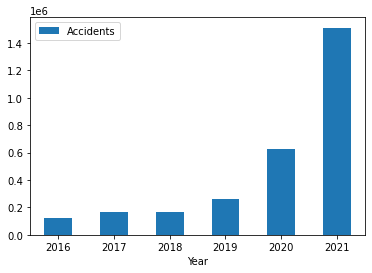

In [17]:
df = pd.DataFrame({'Year':[2016,2017,2018,2019,2020,2021], 'Accidents':[122024,163918,163176,258615,625864,1511745]})
ax = df.plot.bar(x='Year', y='Accidents', rot=0)

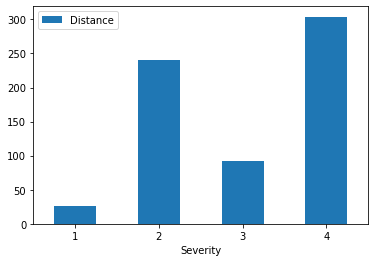

In [25]:
#what is dist values? max dist? avg dist in miles?
df = pd.DataFrame({'Severity':[1,2,3,4], 'Distance':[26.239,240.93800000000002,92.65199999999997,303.871]})
ax = df.plot.bar(x='Severity', y='Distance', rot=0) #remove 3rd severity?

In [26]:
#doubt what is dist values? max dist? avg dist in miles? #histogram requires sequence of values to be put in bucket
# df = pd.DataFrame({"": [1,2,3,4], "Distance": [26.239,240.93800000000002,92.65199999999997,303.871]})
# ax = df.plot.hist(column=["Severity"], by="Distance", figsize=(10, 8))

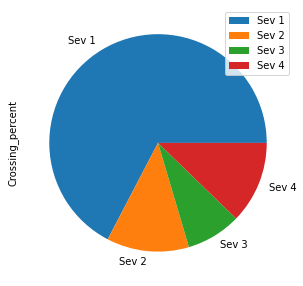

In [29]:
#severity vs crossing - doubt - is it sev 1,2,3,4 or vice versa - this pattern of answer makes not much sense
df = pd.DataFrame({'Crossings': [33,6,4,6]},
                  index=['Sev 1','Sev 2','Sev 3','Sev 4'])
plot = df.plot.pie(y='Crossings', figsize=(5, 5))

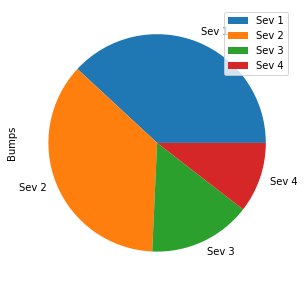

In [34]:
#severity vs bump()
#[ 0.0004,0.00038,0.00016,0.00011]
df = pd.DataFrame({'Bumps': [0.4,0.38,0.16,0.11]},  #x1000 
                  index=['Sev 1','Sev 2','Sev 3','Sev 4'])
plot = df.plot.pie(y='Bumps', figsize=(5, 5))

In [ ]:
severity = [1,2,3,4]
weather_clear = severity_clear[1:]
weather_rain = severity_dust[1:] # rain
weather_snow = severity_snow[1:]
weather_sand = severity_sand[1:]

[0, 118638, 29924, 25261] [0, 0, 0, 0] [0, 121, 14, 27] [0, 30780, 8709, 5643]


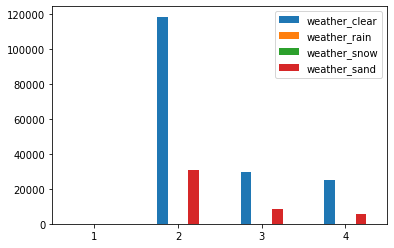

In [43]:
#severity vs weather #[no accident 1 with weather clear] [0,0.046,0.192,0.192]   [ 4 weather attributes ]
# why five values in list? # rain replaced by something else? and leave sev 1
print (weather_clear, weather_rain, weather_snow, weather_sand)
df = pd.DataFrame({'weather_clear': weather_clear,
                   'weather_rain': weather_rain,
                   'weather_snow': weather_snow,
                   'weather_sand': weather_sand}, index=severity)
ax = df.plot.bar(rot=0)

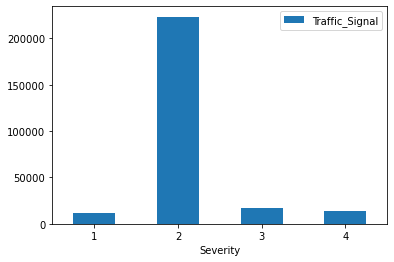

In [46]:
#severity vs traffic signal [0, 11949, 223353, 16549, 13412] signal
#get 100 points in each severity? - count number of traffic signals in each
traffic_signal = [11949, 223353, 16549, 13412]
df = pd.DataFrame({'Severity':[1,2,3,4], 'Traffic_Signal':traffic_signal})
ax = df.plot.bar(x='Severity', y='Traffic_Signal', rot=0) #remove 3rd severity?

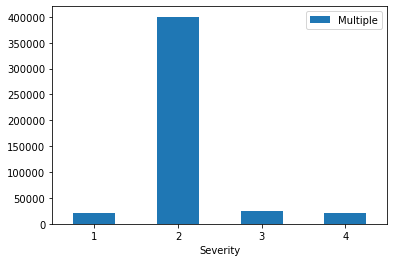

In [47]:
#severity vs multiple [count atleast one road condition for each severity ]
#[0, 20601, 400207, 24090, 21598] multiple
df = pd.DataFrame({'Severity':[1,2,3,4], 'Multiple':[20601, 400207, 24090, 21598]})
ax = df.plot.bar(x='Severity', y='Multiple', rot=0) #remove 3rd severity?

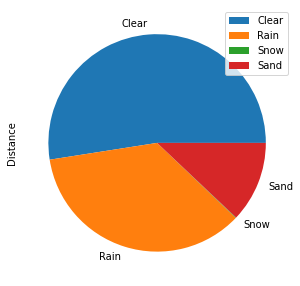

In [49]:
#weather vs distance [ clear weather should have less distance of all --  collect 10 points for each weather]  [2.819, 11.474, 24.534000000000002, 2.448] weather vs dist   0.28,1.1,2.45,0.24
#[130958.51999999855, 88369.79300000209, 170.19299999999996, 30083.56000000028] weather vs dist
# snow is negligible here
df = pd.DataFrame({'Distance': [130958.51999999855, 88369.79300000209, 170.19299999999996, 30083.56000000028]},
                  index=['Clear', 'Rain', 'Snow', 'Sand'])
plot = df.plot.pie(y='Distance', figsize=(5, 5))